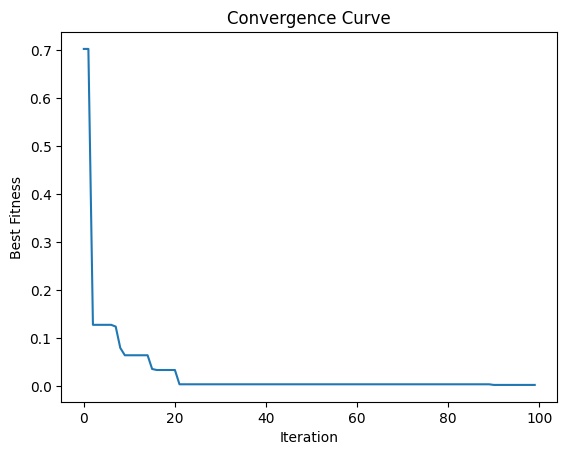

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return np.sum(x**2)

def artificial_bee_colony(objective_function, num_bees, num_iterations, lower_bound, upper_bound):
    population = np.random.uniform(lower_bound, upper_bound, (num_bees, 2))
    best_solution = None
    best_fitness = float('inf')
    history = []

    for iteration in range(num_iterations):
        fitness = np.array([objective_function(x) for x in population])

        if np.min(fitness) < best_fitness:
            best_solution = population[np.argmin(fitness)]
            best_fitness = np.min(fitness)

        for i in range(num_bees):
            j = np.random.choice([idx for idx in range(num_bees) if idx != i])
            phi = np.random.uniform(-1, 1)
            candidate = population[i] + phi * (population[i] - population[j])
            candidate = np.clip(candidate, lower_bound, upper_bound)
            candidate_fitness = objective_function(candidate)

            if candidate_fitness < fitness[i]:
                population[i] = candidate

        probabilities = fitness / np.sum(fitness)
        for i in range(num_bees):
            j = np.random.choice(range(num_bees), p=probabilities)
            phi = np.random.uniform(-1, 1)
            candidate = population[i] + phi * (population[i] - population[j])
            candidate = np.clip(candidate, lower_bound, upper_bound)
            candidate_fitness = objective_function(candidate)

            if candidate_fitness < fitness[i]:
                population[i] = candidate

        for i in range(num_bees):
            if fitness[i] > best_fitness:
                population[i] = np.random.uniform(lower_bound, upper_bound, 2)

        history.append(best_fitness)

    return best_solution, best_fitness, history

num_bees = 50
num_iterations = 100
lower_bound = -5
upper_bound = 5

best_solution, best_fitness, history = artificial_bee_colony(objective_function, num_bees, num_iterations, lower_bound, upper_bound)

plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.title('Convergence Curve')
plt.show()
